In [134]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, Flatten, Dense

In [159]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

In [160]:
train_generator = train_datagen.flow_from_directory(
        'data',
        target_size=(28, 28),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'data',
        target_size=(28, 28),
        batch_size=32,
        class_mode='binary')

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [182]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

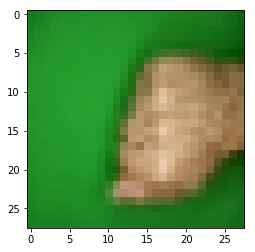

In [128]:
plt.imshow(train_generator[0][0][2])

In [133]:
train_generator[0][0][2].shape

(28, 28, 3)

In [135]:
### calculating padding
height=28
width = 28
kernel_size = 5 # we
padding = int((kernel_size-1)/2)
stride=1

#output_after_1_convolution
out1=(height-kernel_size+(2*padding))/1 + 1 #=28

output_pool1 = out1/padding #=14


out2=(output_pool1-kernel_size+(2*padding))/1 + 1 #= 14

output_pool2 = out2/padding #=7

In [136]:
output_pool1

14.0

In [154]:
#from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

In [155]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000// batch_size,
        epochs=20,
        validation_data=test_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')

Epoch 1/20
62/62 [==============================] - 9s 139ms/step - loss: 1.0885 - acc: 0.3926 - val_loss: 0.9101 - val_acc: 0.6050
Epoch 2/20
62/62 [==============================] - 8s 123ms/step - loss: 1.0595 - acc: 0.5066 - val_loss: 0.7951 - val_acc: 0.6744
Epoch 3/20
62/62 [==============================] - 8s 130ms/step - loss: 1.0079 - acc: 0.5917 - val_loss: 0.6285 - val_acc: 0.7575
Epoch 4/20
62/62 [==============================] - 9s 152ms/step - loss: 0.9392 - acc: 0.6507 - val_loss: 0.6187 - val_acc: 0.8375
Epoch 5/20
62/62 [==============================] - 8s 124ms/step - loss: 0.8223 - acc: 0.7255 - val_loss: 0.9222 - val_acc: 0.8359
Epoch 6/20
62/62 [==============================] - 8s 122ms/step - loss: 0.7155 - acc: 0.7564 - val_loss: 1.0577 - val_acc: 0.8413
Epoch 7/20
62/62 [==============================] - 8s 123ms/step - loss: 0.6095 - acc: 0.7997 - val_loss: 1.0160 - val_acc: 0.8833
Epoch 8/20
62/62 [==============================] - 8s 126ms/step - loss: 0.

### testing single image

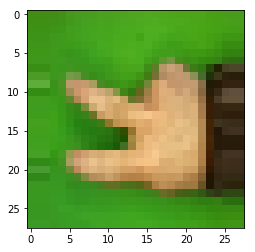

In [290]:
test_image=test_generator[0][0][11]
plt.imshow(test_image)

In [291]:

test_image=np.expand_dims(test_image, axis=0)

In [303]:
outputs=model.predict(test_image)
output=outputs.argmax()
pred_dict=pd.DataFrame.from_dict(train_generator.class_indices.items()).rename(columns={0:'type',1:'label'})
print("prediction:")
print(pred_dict[pred_dict['label']==output]['type'])

if output==int(pred_dict[pred_dict['label']==output]['label']):
    print("correct pred!")
else:
    print('better luck nekk time')

prediction:
2    scissors
Name: type, dtype: object
correct pred!
